In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive"


'AI tools.gdoc'
'Assignment No: 1'$'\n''Title   Objective: Identify and....gsheet'
 Bhumi_Project
 Brochure.gdoc
'Colab Notebooks'
'Copy of GreenByte_ppt.pptx'
'data (1).csv'
'dsa lab assignments '
'floatchat-ui (2).zip'
'GIS TOOLS 2.gdoc'
 Task4
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled document.gdoc'


In [4]:
!ls "/content/drive/MyDrive/Task4"


'archive (5).zip'


In [5]:
import zipfile

zip_path = "/content/drive/MyDrive/Task4/archive (5).zip"
extract_path = "/content/Task4_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Done!")


Extraction Done!


In [6]:
!ls "/content/Task4_data"


leapgestrecog  leapGestRecog


In [7]:
!ls "/content/Task4_data/leapGestRecog"


00  01	02  03	04  05	06  07	08  09


In [9]:
import os
import shutil

source = "/content/Task4_data/leapGestRecog"
target = "/content/Task4_data/flattened"

os.makedirs(target, exist_ok=True)

classes = sorted(os.listdir(source))


In [10]:
import os
import shutil

source = "/content/Task4_data/leapGestRecog"
target = "/content/Task4_data/flattened"

os.makedirs(target, exist_ok=True)

classes = sorted(os.listdir(source))

for gesture_class in classes:
    class_path = os.path.join(source, gesture_class)

    if not os.path.isdir(class_path):
        continue

    # Create gesture class folder in flattened structure
    flat_class_folder = os.path.join(target, gesture_class)
    os.makedirs(flat_class_folder, exist_ok=True)

    # Loop through subject folders inside each class
    for subject in os.listdir(class_path):
        subject_path = os.path.join(class_path, subject)

        if os.path.isdir(subject_path):
            for img in os.listdir(subject_path):
                img_src = os.path.join(subject_path, img)
                img_dst = os.path.join(flat_class_folder, f"{subject}_{img}")  # rename to avoid conflicts

                shutil.copy(img_src, img_dst)

print("Flattening complete!")


Flattening complete!


In [11]:
!ls "/content/Task4_data/flattened"


00  01	02  03	04  05	06  07	08  09


In [12]:
!ls "/content/Task4_data/flattened/00" | head


01_palm_frame_00_01_0001.png
01_palm_frame_00_01_0002.png
01_palm_frame_00_01_0003.png
01_palm_frame_00_01_0004.png
01_palm_frame_00_01_0005.png
01_palm_frame_00_01_0006.png
01_palm_frame_00_01_0007.png
01_palm_frame_00_01_0008.png
01_palm_frame_00_01_0009.png
01_palm_frame_00_01_0010.png


In [13]:
from sklearn.model_selection import train_test_split
import os, shutil

base_dir = "/content/Task4_data/flattened"
train_dir = "/content/Task4_data/train"
test_dir = "/content/Task4_data/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

classes = sorted(os.listdir(base_dir))

for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    images = os.listdir(cls_path)

    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(train_dir, cls, img))

    for img in test_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(test_dir, cls, img))

print("Dataset split completed!")


Dataset split completed!


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


In [15]:
img_width, img_height = 64, 64
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/Task4_data/train",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    "/content/Task4_data/test",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 gesture classes
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
epochs = 10

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 92ms/step - accuracy: 0.6233 - loss: 1.0470 - val_accuracy: 0.9865 - val_loss: 0.0335
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 87ms/step - accuracy: 0.9807 - loss: 0.0549 - val_accuracy: 0.9895 - val_loss: 0.0172
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.9859 - loss: 0.0309 - val_accuracy: 0.9887 - val_loss: 0.0166
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 88ms/step - accuracy: 0.9886 - loss: 0.0226 - val_accuracy: 0.9895 - val_loss: 0.0193
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step - accuracy: 0.9875 - loss: 0.0290 - val_accuracy: 0.9905 - val_loss: 0.0143
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step - accuracy: 0.9881 - loss: 0.0222 - val_accuracy: 0.9908 - val_loss: 0.0146
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.9875 - loss: 0.0276 - val_accuracy: 0.9902 - val_loss: 0.0218
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.9917 - loss: 0.0169 - 

In [19]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9906 - loss: 0.0135
Test Accuracy: 99.02%
Test Loss: 0.0140


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
Predicted Class: 3


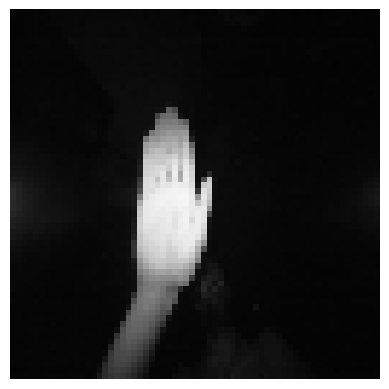

In [20]:
import cv2

img_path = "/content/Task4_data/test/03/" + os.listdir("/content/Task4_data/test/03")[0]

img = cv2.imread(img_path)
img = cv2.resize(img, (64, 64))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

img = img / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
print("Predicted Class:", np.argmax(pred))


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels & predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred))


125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step
              precision    recall  f1-score   support

           0       0.10      0.10      0.10       400
           1       0.11      0.11      0.11       400
           2       0.10      0.11      0.10       400
           3       0.12      0.12      0.12       400
           4       0.08      0.08      0.08       400
           5       0.09      0.08      0.08       400
           6       0.12      0.12      0.12       400
           7       0.10      0.10      0.10       400
           8       0.09      0.09      0.09       400
           9       0.08      0.08      0.08       400

    accuracy                           0.10      4000
   macro avg       0.10      0.10      0.10      4000
weighted avg       0.10      0.10      0.10      4000



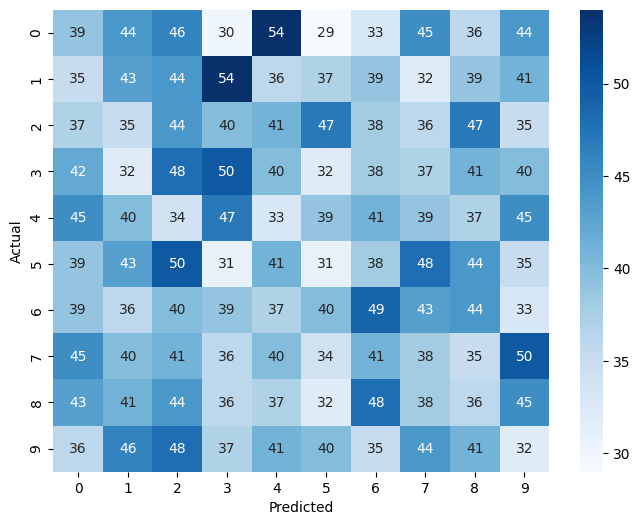

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
